### connect to gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Data Analysis"

/content/drive/MyDrive/Data Analysis


### connect to kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp .kaggle/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25           4098        127  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           3401         98  1.0              
thedevastator/fast-food-restaurants-in-the-united-states        Fast Food Restaurants in the United States            4MB  2022-10-08 17:30:38           1173         32  1.0              
whenamancodes/students-performance-in-exams                 

# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
2. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
3. Сохраните датасет

4. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
2. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
3. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
4. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
5. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
6. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
7. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
8. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

### download anime dataset

In [ ]:
! kaggle datasets download -d thunderz/anime-dataset

 61% 17.0M/27.9M [00:00<00:00, 57.5MB/s]
100% 27.9M/27.9M [00:00<00:00, 80.0MB/s]


In [ ]:
! mkdir data/anime
! unzip anime-dataset.zip -d data/anime

Archive:  anime-dataset.zip
  inflating: data/anime/MAL_genres.pickle  
  inflating: data/anime/anime_data.csv  
  inflating: data/anime/user_data.csv  


## Data preprocessing

### reading data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/anime/anime_data.csv')
df.head(3)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV


In [ ]:
#dataset size
n = len(df)
n

11335

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         11335 non-null  int64  
 1   aired_from     11330 non-null  object 
 2   aired_to       5967 non-null   object 
 3   duration       11335 non-null  object 
 4   episodes       11335 non-null  int64  
 5   genres         11335 non-null  object 
 6   popularity     11335 non-null  int64  
 7   premiered      3455 non-null   object 
 8   rank           10053 non-null  float64
 9   rating         11335 non-null  object 
 10  score          11335 non-null  float64
 11  scored_by      11335 non-null  int64  
 12  source         11335 non-null  object 
 13  status         11335 non-null  object 
 14  studios        11335 non-null  object 
 15  synopsis       11098 non-null  object 
 16  title          11335 non-null  object 
 17  title_english  5394 non-null   object 
 18  type  

### missing values processing

How missing values are handled depends on the task, so suppose we want to predict popularity or score.

In [ ]:
# percentage of missing values
null_percentage = ((n - df.count()) / n * 100)
null_percentage[null_percentage > 0.].round(2)

aired_from        0.04
aired_to         47.36
premiered        69.52
rank             11.31
synopsis          2.09
title_english    52.41
dtype: float64

In [ ]:
# - few number of rows with missing 'aired_from' 'synopsis'
# - assume target depends on release date and synopsis
df.dropna(subset=['aired_from', 'synopsis'], inplace=True)

In [ ]:
# 'premiered' ~ 'aired_from'
# 'rank' if calculated from 'score'
# too many 'title_english' missing 
df.drop(columns=['premiered', 'rank', 'title_english'], inplace=True)

In [ ]:
# show rows with missing 'aired_to' value
df[df['aired_to'].isnull()].head(2)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,rating,score,scored_by,source,status,studios,synopsis,title,type
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie


In [ ]:
# set missing 'aired_to' date to corresponding 'aired_from'
df.loc[df['aired_to'].isnull(),'aired_to'] = df['aired_from']

In [ ]:
# check if values assigned correctly
df.iloc[2:4]

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,rating,score,scored_by,source,status,studios,synopsis,title,type
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,TV
3,10003,2008-01-01T00:00:00+00:00,2008-01-01T00:00:00+00:00,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,OVA


In [ ]:
# check no missing values left
df.columns[df.isnull().any()]

Index([], dtype='object')

### plots

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['aired_from'] = pd.to_datetime(df['aired_from'], format='%Y-%m-%d')
df['aired_to'] = pd.to_datetime(df['aired_to'], format='%Y-%m-%d')

In [ ]:
scores_by_year = df[['aired_from','score']].groupby(df['aired_from'].dt.year).mean()
scores_by_year.sort_values(by=['aired_from'], inplace=True)
scores_by_year.head()

,score
aired_from,
1917,5.312500
1918,4.680000
1924,5.340000
1925,5.556667
1926,5.273333


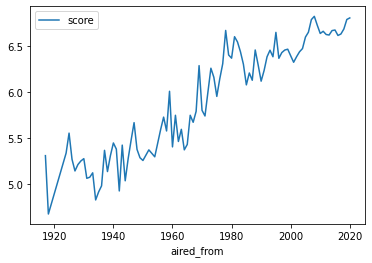

In [ ]:
# average score through years
scores_by_year.plot()

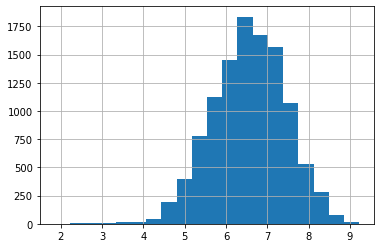

In [ ]:
# scores are normally distributed
df['score'].hist(bins=20)

In [ ]:
# create column for airing duration in months
df['duration'] = (df['aired_to'] - df['aired_from']).dt.days // 30
df.drop(columns=['aired_to'], inplace=True)
df.head(2)

,mal_id,aired_from,duration,episodes,genres,popularity,rating,score,scored_by,source,status,studios,synopsis,title,type
0,1,1998-04-03 00:00:00+00:00,12,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,TV
1,100,2001-04-04 00:00:00+00:00,2,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,TV


Text(0, 0.5, 'episodes')

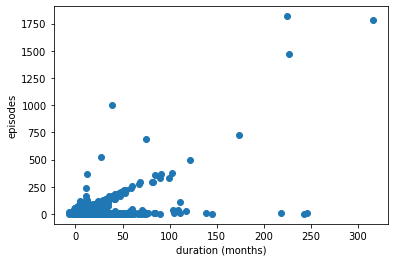

In [ ]:
# airing duration and number of episodes
plt.scatter(df['duration'], 
            df['episodes'])
plt.xlabel('duration (months)')
plt.ylabel('episodes')

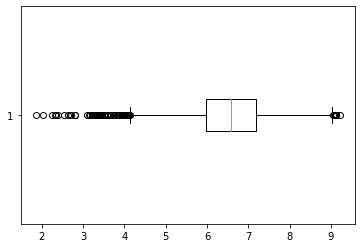

In [ ]:
# boxplot for score
plt.boxplot(df['score'], vert=False)
plt.show()

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

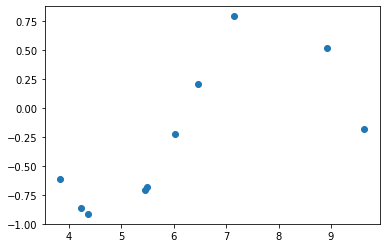

In [ ]:
np.random.seed(0)

n = 10
x = np.random.uniform(high=10.0, size=n)
y = np.sin(x) + np.random.normal(scale=0.2)

plt.scatter(x, y)

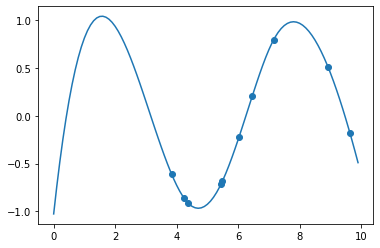

In [ ]:
x_order = x.argsort()

# https://github.com/scipy/scipy/blob/v1.9.3/scipy/interpolate/_cubic.py#L464-L854
cs = CubicSpline(x[x_order], y[x_order])
interp_x = np.arange(0., 10.0, 0.1)
plt.scatter(x, y)
plt.plot(interp_x, cs(interp_x))
plt.show()

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


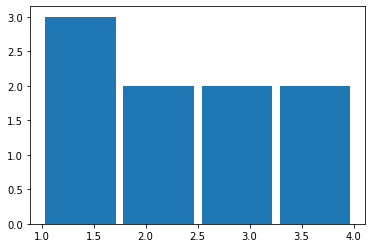

In [ ]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [ ]:
from typing import List, Tuple, Union

def minmax(array: List[Union[int, float]]):
    if len(array) == 0:
        return None, None
    minv = array[0]
    maxv = array[0]
    for v in array:
        if v < minv:
            minv = v
            continue
        if v > maxv:
            maxv = v
    return minv, maxv

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    l, r = minmax(array)
    scale = r - l
    bin_size = scale / bins
    labels = [None] * (bins + 1)
    values = [0] * bins
    curv = l
    for i in range(bins):
        labels[i] = curv
        curv += bin_size
    labels[bins] = r

    for v in array:
        bin = min(int((v-l)/bin_size), bins - 1)
        values[bin] += 1
    return values, labels

In [ ]:
np.random.seed(0)

array = np.random.normal(scale=10.0, size=1000)
bins = 50

27.6 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


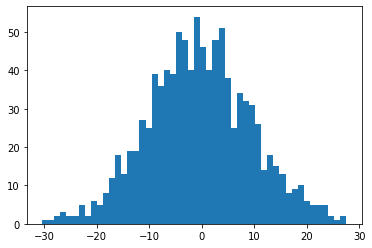

In [ ]:
%%timeit
value_counts, bins_names, _ = plt.hist(array, bins=bins)

In [ ]:
%%timeit
my_value_counts, my_bins_names = fast_hist(array, bins=bins)

907 µs ± 336 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<BarContainer object of 50 artists>

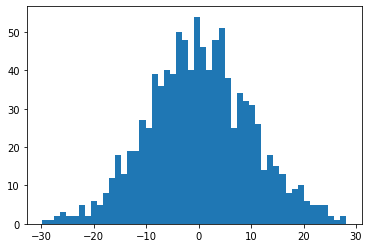

In [ ]:
width = my_bins_names[1] - my_bins_names[0]
half_width = width / 2
my_plt_bins_names = [my_bins_names[i] + half_width for i in range(bins)]
plt.bar(my_plt_bins_names, my_value_counts, width = width)